# Exercice 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io

In [2]:
## Fonctions utiles

def niceDisplay14(affichages,titres=None):
    """ list[Array]*list[str] -> NoneType
        display from 1 up to 4 images or vectors with optionnal titles
        2D arrays are displayed as image with imshow()
        1D arrays are displayed as curve with plot()
    """
    
    if not type(affichages) == type([]):
        affichages = [affichages]
        
    if titres is None:
        titres = ['',]*len(affichages)
        
    if not type(titres) == type([]):
        titres = [titres]
    
    nb_affichages = len(affichages)
    if nb_affichages >4 or nb_affichages < 1 :
        raise ValueError('niceDisplay_14 : affichage should be a list of length 1 up to 4')
        
    if nb_affichages != len(titres):
        raise ValueError('niceDisplay_14 : titres must have same length than affichage')
        
    courbes = False
    for i in range(0,nb_affichages):
        s = plt.subplot(101+10*nb_affichages+i)
        s.set_title(titres[i])
        if len(affichages[i].shape)==2 and affichages[i].shape[0] > 1 and affichages[i].shape[1] > 1:
            # on affiche une image
            s.imshow(affichages[i], cmap="gray",interpolation='nearest', aspect='equal')
        else :
            # il s'agit d'une seule ligne, à afficher comme une courbe
            plt.plot(affichages[i])
            courbes=True

    agrandissement_h = nb_affichages
    agrandissement_v = nb_affichages*2 if courbes else nb_affichages
    params = plt.gcf()
    plSize = params.get_size_inches()
    params.set_size_inches( (plSize[0]*agrandissement_v, plSize[1]*agrandissement_h) )
    plt.show()

def imshow(I, title=None, size=500, axis=False):
    """ display an image, with title, size, and axis """
    plt.figure(figsize=(size//80, size//80))
    plt.gray()
    #plt.hot()
    plt.imshow(I)
    if not axis: plt.axis('off')
    if title: plt.title(title)
    plt.show()

In [46]:
yaleFaces = scipy.io.loadmat('YaleFaces.mat') # Chargement de la base YaleFaces

# Entrainement (90 visages)
X_train = yaleFaces['X_train']            # (4096, 90)
cat_train = yaleFaces['cat_train'][0]     # (90,)
id_train = yaleFaces['id_train'][0] - 1   # (90,)

# Test (30 visages)
X_test = yaleFaces['X_test']              # (4096, 30)
cat_test = yaleFaces['cat_test'][0]       # (30,)
id_test = yaleFaces['id_test'][0] - 1     # (30,)

# non visages
X_noface = yaleFaces['X_noface']           # (4096, 10)

In [4]:
def meanFaces(X):
    """ Array[d,n] -> Vector[d] """
    return np.mean(X,1)

In [5]:
def centeredFaces(X,g):
    """ Array[d,n]*Vector[d] -> Array[d,n] """
    return np.transpose( np.transpose(X) - g )

In [6]:
def deflat(V):
    """ Vector[4096] -> Array[64,64] """
    return np.transpose( V.reshape(64,64) )

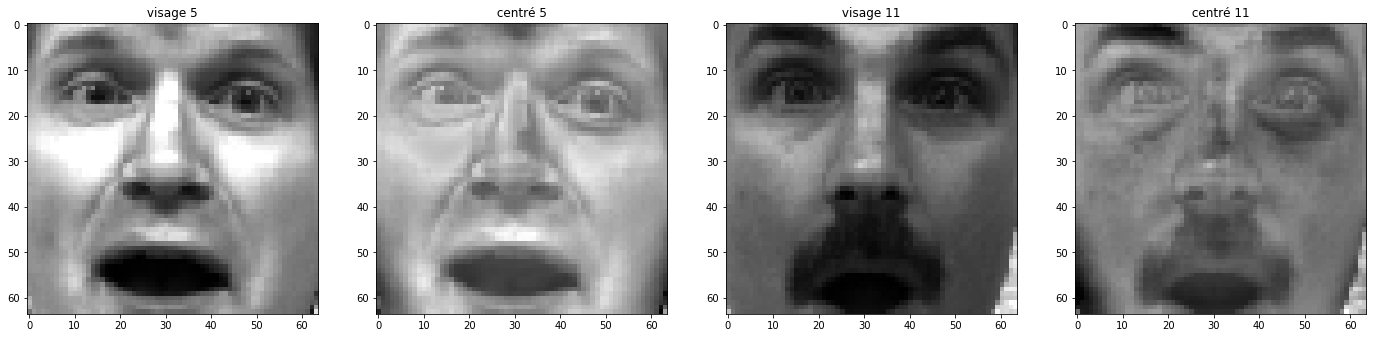

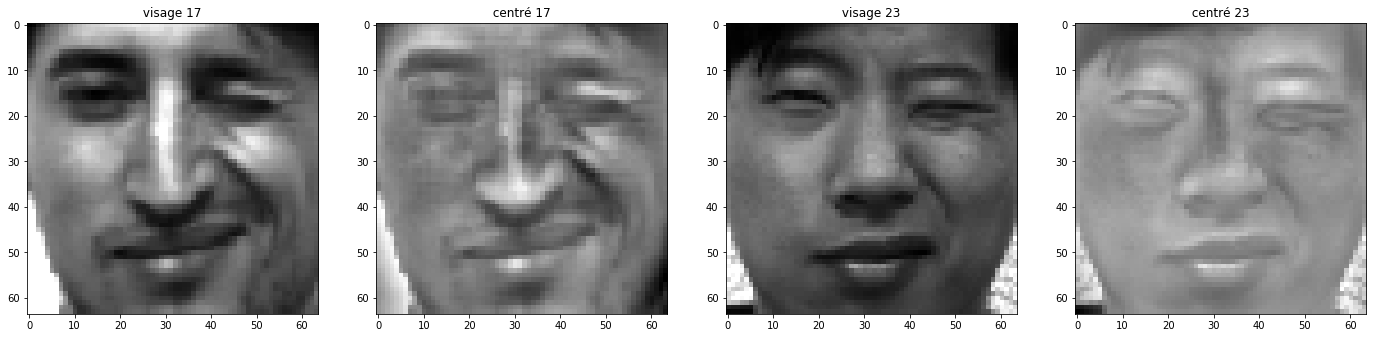

In [7]:
g = meanFaces(X_train)
Xcf = centeredFaces(X_train, g)
img5c = deflat(Xcf[:,5])
img11c = deflat(Xcf[:,11])
img17c = deflat(Xcf[:,17])
img23c = deflat(Xcf[:,23])

img5 = deflat(X_train[:,5])
img11 = deflat(X_train[:,11])
img17 = deflat(X_train[:,17])
img23 = deflat(X_train[:,23])

niceDisplay14( [ img5, img5c, img11, img11c ], [ " visage 5 ", " centré 5 ", " visage 11 ", " centré 11 "  ] )
niceDisplay14( [ img17, img17c, img23, img23c ], [ " visage 17 ", " centré 17 ", " visage 23 ", " centré 23 "  ] )

# Exercice 2

In [8]:
def eigenfaces(Xc):
    """ Array[d,n] -> Array[d,n]*Vector[n] """
    U, S, V = np.linalg.svd(Xc, full_matrices=False)
    S *= S
    S /= np.sum(S) # normalisation
    return U, S

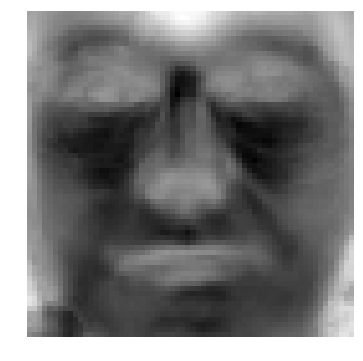

In [9]:
U, S = eigenfaces(Xcf)
imshow(deflat(U[:,0]))

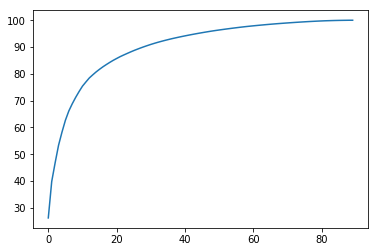

In [10]:
plt.plot(np.cumsum(S)*100)

# Exercice 3

In [11]:
def projEigenFace(x, x_mean, W, K):
    """ Vector[d]*Vector[d]*Array[d,n]*int -> Vector[K] """
    Wk = np.transpose(W[:,:K])
    X = x - x_mean
    z = np.zeros(K)
    for i in range(K):
        z[i] = np.sum(Wk[i,:] * X)
    return z
    #return np.transpose(W[:,:K]) * (x-x_mean)

In [12]:
def reconstruct(z, x_mean, W, K):
    """ Vector[K]*Vector[d]*Array[d,n]*int -> Vector[d] """
    y = np.zeros(W.shape[0])
    for i in range(W.shape[0]):
        y[i] = np.sum(W[i,:K] * z)
    return x_mean + y 

In [13]:
def errorReconstruct(x_r, x):
    """ Vector[d]*Vector[d] -> double """
#     return np.sqrt(np.sum((x-x_r)**2))
    return np.linalg.norm(x-x_r)

In [14]:
def afficheReconstruction(x, x_mean, W, listeK):
    """ Vector[d]*Vector[d]*Array[d,n]*list[int] -> NoneType """
    imshow(deflat(x), title = "Image initiale") # affichage image initiale
    tab = np.zeros(len(listeK))
    for i in range(len(listeK)):
        z = projEigenFace(x, x_mean, W, listeK[i])
        x_r = reconstruct(z, x_mean, W, listeK[i])
        imshow(deflat(x_r), title = "Image reconstruite "+str(listeK[i]))
        print("Err : ", errorReconstruct(x_r,x))
        tab[i] = errorReconstruct(x_r,x)
    plt.plot(listeK, tab)
    return None

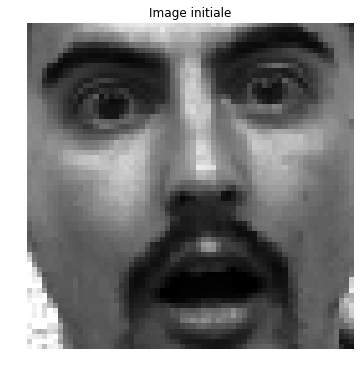

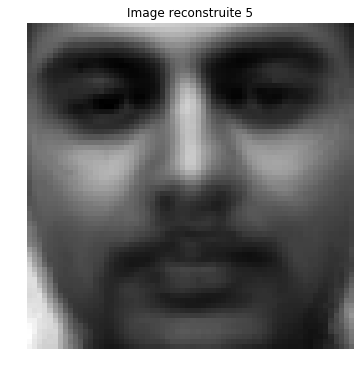

Err :  1862.8351214396762


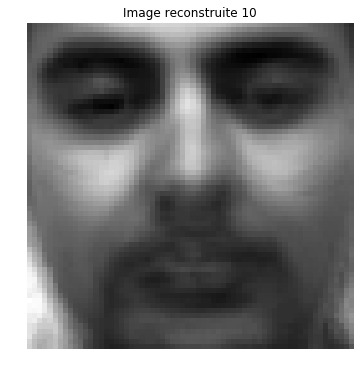

Err :  1760.9402979543065


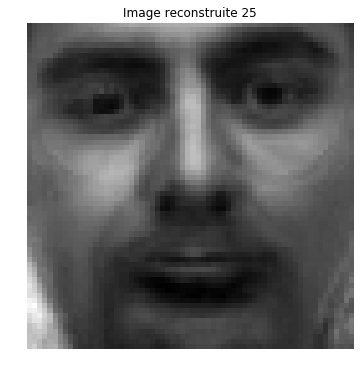

Err :  1473.2494583784244


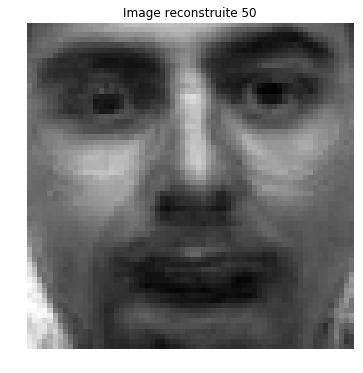

Err :  1344.739663085406


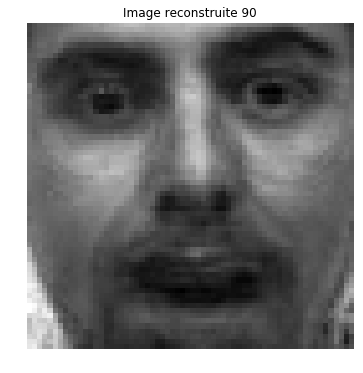

Err :  1288.6330745817666


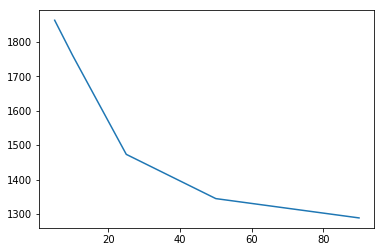

In [19]:
listeK = np.array([5,10,25,50,90])
x17 = X_test[:,17]         # image originale
x50 = X_train[:,50]
x55 = X_train[:,55]

afficheReconstruction(x17, g, U, listeK) 
# img 55, K = 90, err = 3.7, idem à l'originale
# img 17, K = 90, err = 1288, non idem à l'originale

# Exercice 4

In [27]:
def calculMatDist(X_train, X_test, W, K):
    """ Array[d,n]*Array[d,m]*Array[d,n]*int -> Array[m,n] """
    m = X_test.shape[1]
    n = X_train.shape[1]
    dist = np.zeros((m,n))
    g = meanFaces(X_train)
    Xc_train = centeredFaces(X_train, g)
    Xc_test = centeredFaces(X_test, g)
        
    for i in range(m):
        z_test = projEigenFace(X_test[:,i], g, W, K) # calcul de tous les z_test
        for j in range(n):
            z_train = projEigenFace(X_train[:,j], g, W, K) # calcul de tous les z_train
            dist[i,j] = np.linalg.norm(z_test - z_train)

    return dist

In [28]:
def identification(D, id_train):
    max_proj = np.argmin(D, 1)
    return np.array([id_train[rang_image] for rang_image in max_proj])

Text(0,0.5,'Nb visages reconnus')

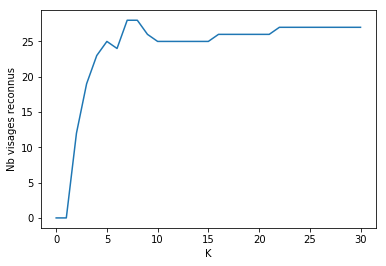

In [33]:
tab = np.zeros(31)
for k in range(30,1,-1):
    D = calculMatDist(X_train, X_test, U, k)
    iden = identification(D, id_train)
    tab[k] = np.where(iden == id_test,1,0).sum()
plt.plot(tab)
plt.xlabel("K")
plt.ylabel("Nb visages reconnus")

In [36]:
D = calculMatDist(X_train, X_train, U, 30)
iden = identification(D, id_train)
print(iden == id_train)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True]


In [42]:
print(id_test)
print(id_train)

[ 0  0  1  1  2  2  3  3  4  4  5  5  6  6  7  7  8  8  9  9 10 10 11 11
 12 12 13 13 14 14]
[ 0  0  0  0  0  0  1  1  1  1  1  1  2  2  2  2  2  2  3  3  3  3  3  3
  4  4  4  4  4  4  5  5  5  5  5  5  6  6  6  6  6  6  7  7  7  7  7  7
  8  8  8  8  8  8  9  9  9  9  9  9 10 10 10 10 10 10 11 11 11 11 11 11
 12 12 12 12 12 12 13 13 13 13 13 13 14 14 14 14 14 14]


In [43]:
D = calculMatDist(X_train, X_test, U, 30)
iden = identification(D, id_train)
print(iden == id_test)
print(D[0:2,:6])

[ True  True  True  True  True  True  True  True  True  True  True  True
  True False  True False  True  True  True  True  True  True  True False
  True  True  True  True  True  True]
[[1862.92719451 2321.77396921 1183.40743791 1542.02073943 1984.27781663
  2461.13048552]
 [1824.65235266 1238.52210423 1601.88468126 2058.17699422 2151.49770068
  2340.21651386]]


# Exercice 5